Import Libraries and Load Feature-Engineered Data

In [1]:
# Import Libraries and Load Feature-Engineered Data 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Load data
data_path = "../data/processed/mental_health_features.csv"
df = pd.read_csv(data_path)

print("Feature-engineered data loaded successfully:", df.shape)
df.head(3)

Feature-engineered data loaded successfully: (1433, 81)


,are_you_selfemployed,how_many_employees_does_your_company_or_organization_have,is_your_employer_primarily_a_tech_companyorganization,is_your_primary_role_within_your_company_related_to_techit,does_your_employer_provide_mental_health_benefits_as_part_of_healthcare_coverage,do_you_know_the_options_for_mental_health_care_available_under_your_employerprovided_coverage,has_your_employer_ever_formally_discussed_mental_health_for_example_as_part_of_a_wellness_campaign_or_other_official_communication,does_your_employer_offer_resources_to_learn_more_about_mental_health_concerns_and_options_for_seeking_help,is_your_anonymity_protected_if_you_choose_to_take_advantage_of_mental_health_or_substance_abuse_treatment_resources_provided_by_your_employer,if_a_mental_health_issue_prompted_you_to_request_a_medical_leave_from_work_asking_for_that_leave_would_be,...,country_France,country_Germany,country_Ireland,country_Netherlands,country_Other,country_Sweden,country_Switzerland,country_United Kingdom,country_United States,age_group
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,0,0,I don't know,Very easy,...,False,False,False,False,False,False,False,True,False,35-45
1,0,6-25,1.0,NaN,No,1,1,1,1,Somewhat easy,...,False,False,False,False,False,False,False,False,True,25-35
2,0,6-25,1.0,NaN,No,NaN,0,0,I don't know,Neither easy nor difficult,...,False,False,False,False,False,False,False,True,False,35-45


Prepare Data for PCA

In [2]:
# Prepare Data for PCA 
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Handle missing values (fill with column mean)
numeric_df = numeric_df.fillna(numeric_df.mean())

# Standardize the data before PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

print("Data standardized successfully")
print("Shape after scaling:", scaled_data.shape)

Data standardized successfully
Shape after scaling: (1433, 18)


Apply PCA

PCA completed successfully
Explained variance by components: [0.17609966 0.13590669]


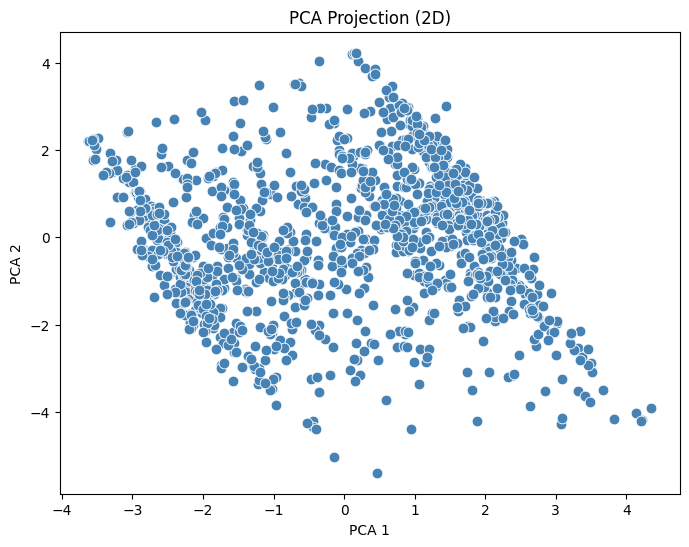

In [3]:
# Apply PCA 
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Add PCA results to dataframe
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("PCA completed successfully")
print(f"Explained variance by components: {explained_variance}")

# Visualize PCA results
plt.figure(figsize=(8,6))
sns.scatterplot(x='PCA1', y='PCA2', data=df, color='steelblue', s=60)
plt.title("PCA Projection (2D)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

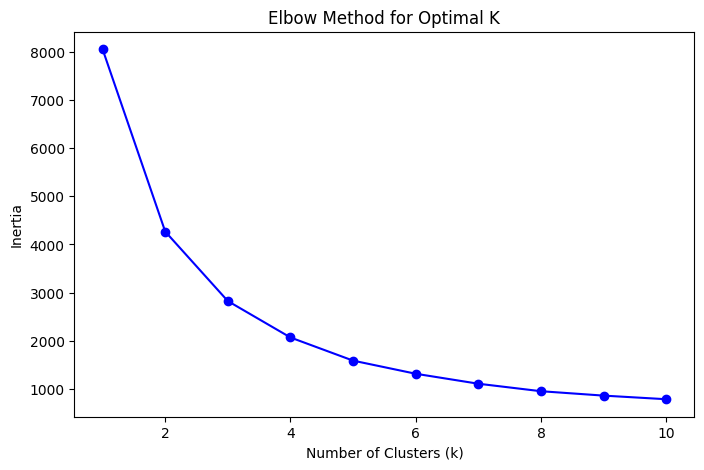

Elbow method plot generated


In [4]:
# Determine Optimal Number of Clusters (Elbow Method) 
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(pca_result)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()

print("Elbow method plot generated")

Determine Optimal Number of Clusters (Elbow Method)

In [5]:
# Apply K-Means Clustering 
# Based on the elbow method result (adjust k as needed)
optimal_k = 3  # You can change this based on the elbow plot

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(pca_result)

print(f" K-Means applied with k={optimal_k}")
df['cluster'].value_counts()

 K-Means applied with k=3


cluster
2    593
1    589
0    251
Name: count, dtype: int64

Visualize Clusters in PCA Space

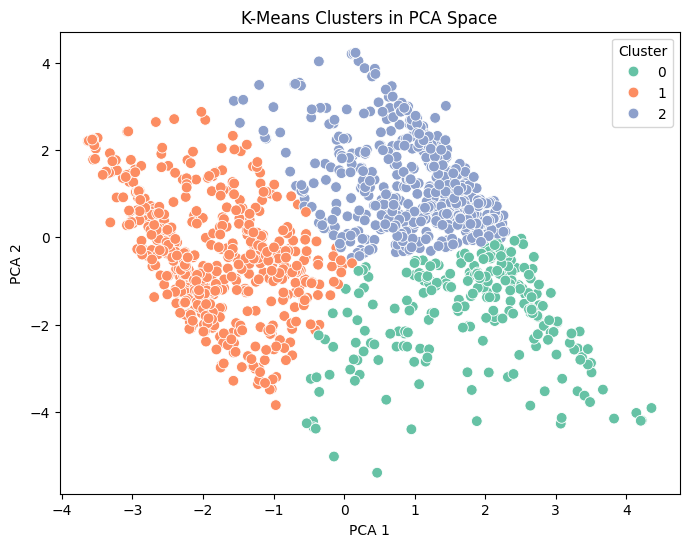

Cluster visualization completed


In [6]:
# Visualize Clusters in PCA Space 
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='PCA1', y='PCA2', 
    hue='cluster', 
    data=df, 
    palette='Set2', 
    s=60
)
plt.title("K-Means Clusters in PCA Space")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title='Cluster')
plt.show()

print("Cluster visualization completed")

Save Clustered Data

In [7]:
# Save Clustered Data 
output_path = "../data/processed/mental_health_clustered.csv"
df.to_csv(output_path, index=False)

print(f"Clustered dataset saved successfully to: {output_path}")

Clustered dataset saved successfully to: ../data/processed/mental_health_clustered.csv
